In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random as rand
from math import e
from tqdm import tqdm
from scipy import integrate

In [3]:
#v is a vector cointanining N elements, each of which has two variables: α and s (s = 0 for defection, s = 1 for cooperation)

def game(v,macrosteps,pars):
                 
    N = len(v)
    vec_a_mean=[]           #empty vector to be filled with the mean value of alpha at each for loop
    vec_x=[]                #empty vector to be filled with the fraction of cooperators at each for loop
    check=[]
    s1_vec=v[:,1]
    a1_vec=v[:,0]     
    
    for t in tqdm(macrosteps, desc = 'Progress Bar'):
        
        v = np.transpose(np.array([a1_vec,s1_vec]))
        amean = np.mean(v[:,0])                       #updated mean of alpha
        vec_a_mean = np.append(vec_a_mean, amean)   
        x = np.mean(v[:,1])                           #updated fraction of cooperators
        vec_x = np.append(vec_x, x)        
        cumulative_payoffs=[]  
        pi = np.zeros(N)
        s1_vec=[]
        a1_vec=[]
        
        for player in range(N):
            a1,s1 = v[player][0],v[player][1] 
            s2 = x
            pm1 = pd.DataFrame(np.array([[-pars['p']*pars['cd']*(1-pars['e'])*(1-pars['d'])-(1-a1)*pars['cn'], -pars['p']*pars['cd']*(1-pars['e'])-(1-a1)*pars['cn']],[-pars['p']*pars['cd']*(1-pars['d']), -pars['p']*pars['cd']]]), index = [1, 0], columns=[1, 0])
            pi[player] =  pm1.at[int(s1),int(s2)]
            cumulative_payoffs = np.append(cumulative_payoffs,pi[player])
                
        for pos1 in range(N):
            pos2=rand.randint(N)
            a1,s1 = v[pos1][0],v[pos1][1]         #alpha,strategy of player 1
            s2 = v[pos2][1]                       #strategy of player 2

            pi_1=cumulative_payoffs[pos1]
            pi_2=cumulative_payoffs[pos2]

            delta_pi = pi_2-pi_1              

            prob = 1/(1+e**(-beta*delta_pi))

            a1_new = a1 + pars['gamma']*(2*x-1)*a1*(1-a1)
            
            if a1_new>=1: a1_new=0.999
            if a1_new<=0: a1_new=0.001

            if rand.random()<prob: s1_new = s2
            else: s1_new = s1
            
            s1_vec=np.append(s1_vec,s1_new)
            a1_vec=np.append(a1_vec,a1_new)
        
    return v, vec_x, vec_a_mean, np.mean(s1_vec), np.mean(a1_vec)

Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 80/80 [00:13<00:00,  5.76it/s]


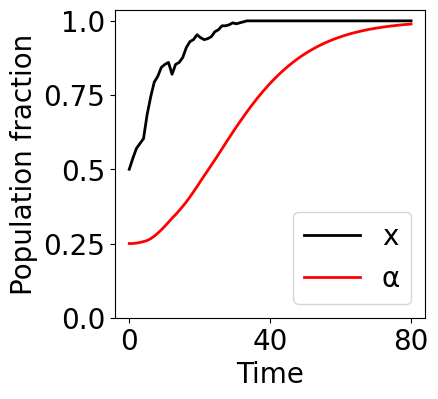

In [16]:
# Parameters
pars={} #initiate parameter dictionary
pars['p']=0.4
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.2
pars['gamma']=0.1

beta=1                           #inverse temperature in Fermi probability function
N=300                            #number of people in the population
n_coop=150                       #number of cooperators
nums = np.zeros(N)
nums[:n_coop] = 1
np.random.shuffle(nums)          #vector containing the strategies of the players (random vector of 1 and 0)
macrosteps = np.linspace(0,80,80)
al = np.linspace(0.001,0.499,N)
np.random.shuffle(al)

#v is a vector cointanining N elements, each of which has two variables: α and s (s = 0 for defection, s = 1 for cooperation)
v = np.transpose(np.array([al,nums]))

r= game(v,macrosteps,pars)

new_a_vec=np.transpose(r[0])     #final updated vector containing the alpha of each player


# Visualize
fig1,ax = plt.figure(figsize=(4, 4)), plt.axes()
plt.plot(macrosteps,r[1],linewidth=2,color='k')
plt.plot(macrosteps,r[2],linewidth=2,color='r')
plt.xlabel('Time',fontsize=20)
plt.ylabel('Population fraction',fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xticks(np.linspace(0,80,3))
ax.set_xticklabels(np.linspace(0,80,3).astype(int),fontsize=20) 
ax.set_yticks(np.linspace(0,1,5))
ax.set_yticklabels(np.linspace(0,1,5).round(decimals=2),fontsize=20) 
plt.legend(['x','α'],fontsize=20,loc='lower right')
plt.show()

In [19]:
pars={} #initiate parameter dictionary
pars['p']=0.4
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.2
pars['gamma']=0.1

beta=1                           #inverse temperature in Fermi probability function
N=300                            #number of people in the population  
macrosteps = np.linspace(0,80,80)
al = np.linspace(0.001,0.999,N)
np.random.shuffle(al)

#v is a vector cointanining N elements, each of which has two variables: α and s (s = 0 for defection, s = 1 for cooperation)


coop = np.linspace(0,1,10)
v_s=[]
v_a=[]

for c_frac in coop:
    
    n_coop=N*c_frac                     #number of cooperators
    nums = np.zeros(N)
    nums[:int(n_coop)] = 1
    np.random.shuffle(nums)        #vector containing the strategies of the players (random vector of 1 and 0)
    
    #v is a vector cointanining N elements, each of which has two variables: α and s (s = 0 for defection, s = 1 for cooperation)
    v = np.transpose(np.array([al,nums]))    
    
    y = game(v,macrosteps,pars)
    v_s= np.append(v_s,y[3])
    v_a= np.append(v_a,y[4])

Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 80/80 [00:13<00:00,  6.04it/s]


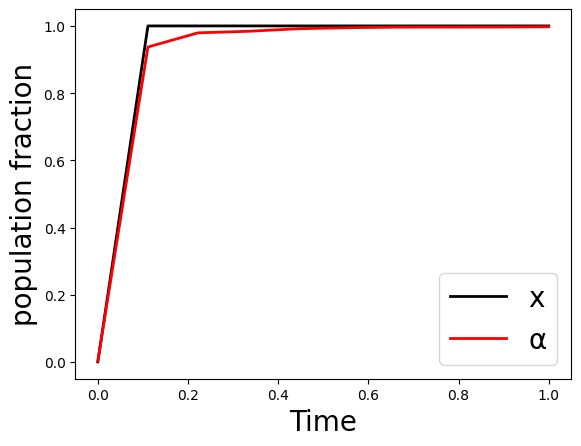

In [20]:
plt.plot(coop,v_s,linewidth=2,color='k')
plt.plot(coop,v_a,linewidth=2,color='r')
plt.xlabel('Time',fontsize=20)
plt.ylabel('population fraction',fontsize=20)
plt.legend(['x','α'],fontsize=20)

plt.show()

In [21]:
pars={} #initiate parameter dictionary
pars['p']=0.4
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.2
pars['gamma']=0.1

beta=1                           #inverse temperature in Fermi probability function
N=300                            #number of people in the population  
macrosteps = np.linspace(0,80,80)
al = np.linspace(0.001,0.499,N)
np.random.shuffle(al)

#v is a vector cointanining N elements, each of which has two variables: α and s (s = 0 for defection, s = 1 for cooperation)


coop = np.linspace(0,1,10)
v_s=[]
v_a=[]

for c_frac in coop:
    
    n_coop=N*c_frac                     #number of cooperators
    nums = np.zeros(N)
    nums[:int(n_coop)] = 1
    np.random.shuffle(nums)        #vector containing the strategies of the players (random vector of 1 and 0)
    
    #v is a vector cointanining N elements, each of which has two variables: α and s (s = 0 for defection, s = 1 for cooperation)
    v = np.transpose(np.array([al,nums]))    
    
    y = game(v,macrosteps,pars)
    v_s= np.append(v_s,y[3])
    v_a= np.append(v_a,y[4])

Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 80/80 [00:14<00:00,  5.71it/s]


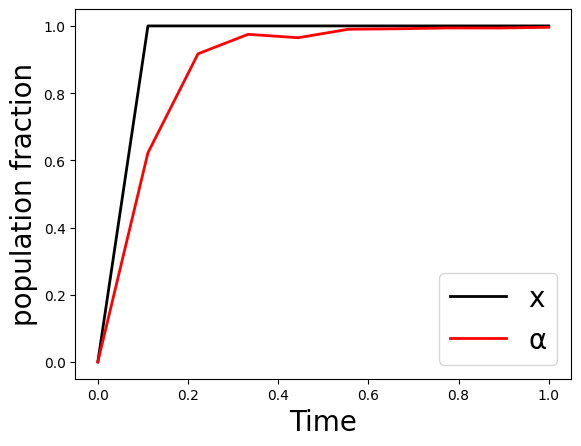

In [22]:
plt.plot(coop,v_s,linewidth=2,color='k')
plt.plot(coop,v_a,linewidth=2,color='r')
plt.xlabel('Time',fontsize=20)
plt.ylabel('population fraction',fontsize=20)
plt.legend(['x','α'],fontsize=20)

plt.show()